# Shapley Values

Shapley values are a powerful concept from cooperative game theory that has been adapted to interpret machine learning models. Shapley values attempt to provide a fair distribution of the total gains (or costs) among the players (or features) in a coalition. In the context of machine learning, Shapley values attribute the contribution of each feature to the model's prediction for a particular instance. This helps in understanding how each feature influences the prediction.


The Shapley value for a feature $i$ in a model $f$ with a feature set $S$ is given by:

\begin{equation}
\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (|N| - |S| - 1)!}{|N|!} \left[ f(S \cup \{i\}) - f(S) \right]
\end{equation}

Where:
- $N$ is the set of all features.
- $S$ is a subset of $N$ excluding feature $i$.
- $f(S \cup \{i\})$ is the model prediction with feature $i$ included.
- $f(S)$ is the model prediction without feature $i$.
- The term $\frac{|S|! (|N| - |S| - 1)!}{|N|!}$ is a weighting factor representing the possible permutations of the features.

This equation ensures that the contribution of each feature is fairly distributed based on its marginal contribution across all possible subsets.

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
n_samples = 1000
temperature = np.random.uniform(0, 40, n_samples)  # Temperature in Celsius
time_of_day = np.random.uniform(0, 24, n_samples)  # Time of day in hours
day_of_week = np.random.randint(0, 7, n_samples)  # Day of the week (0=Sunday, 6=Saturday)

price = (0.1 * (temperature - 20)**2 +
         5 * np.sin((time_of_day - 7) * np.pi / 6) * (time_of_day >= 7) * (time_of_day <= 10) +
         5 * np.sin((time_of_day - 18) * np.pi / 4) * (time_of_day >= 18) * (time_of_day <= 22) +
         -5 * np.sin((time_of_day - 10) * np.pi / 7) * (time_of_day >= 10) * (time_of_day <= 17) +
         7 * np.sin((time_of_day) * np.pi / 24) +
         5 * (day_of_week == 0) +
         np.random.normal(0, 2, n_samples) * 2)

data = pd.DataFrame({
    'Temperature': temperature,
    'Hour': time_of_day,
    'Day': day_of_week,
    'Price': price
})

data.head()

,Temperature,Hour,Day,Price
0,21.952540,14.229126,3,-2.562450
1,28.607575,0.241529,3,7.237870
2,24.110535,11.419829,3,5.621266
3,21.795327,17.010489,5,6.220472
4,16.946192,1.055410,4,-2.435281


In [7]:
# Split data into features and target
X = data[['Temperature', 'Hour', 'Day']]
y = data['Price']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)


RandomForestRegressor(random_state=0)

In [8]:
# Use SHAP to explain the model predictions
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

The force plot visualizes the contribution of each feature to a single prediction.

In [9]:
# Plot SHAP values for a specific instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

The summary plot shows the distribution of Shapley values for all features across the dataset.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


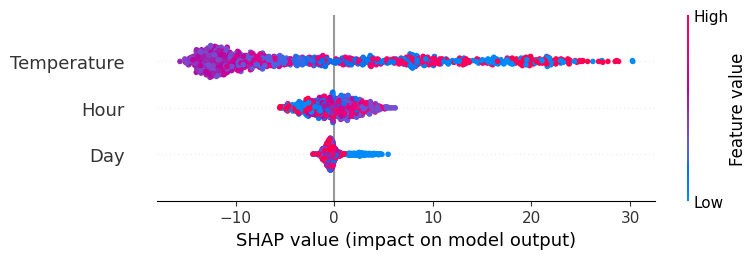

In [5]:
# Summary plot for all instances
shap.summary_plot(shap_values, X)

The dependence plot highlights how a specific feature (e.g., Temperature) influences the prediction, showing possible interactions with other features.

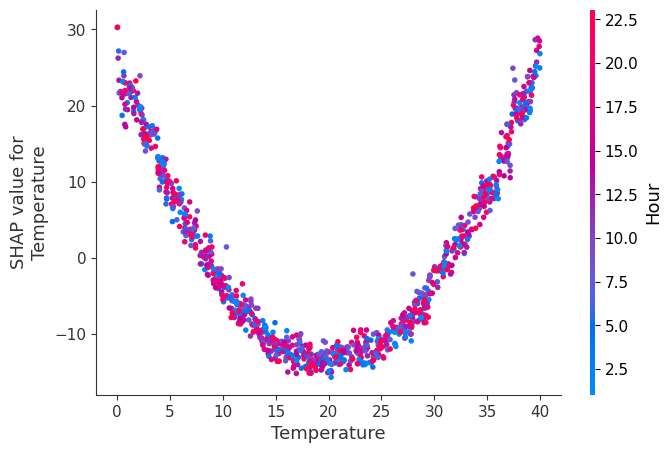

In [15]:
# Dependence plot for a specific feature
shap.dependence_plot('Temperature', shap_values, X)

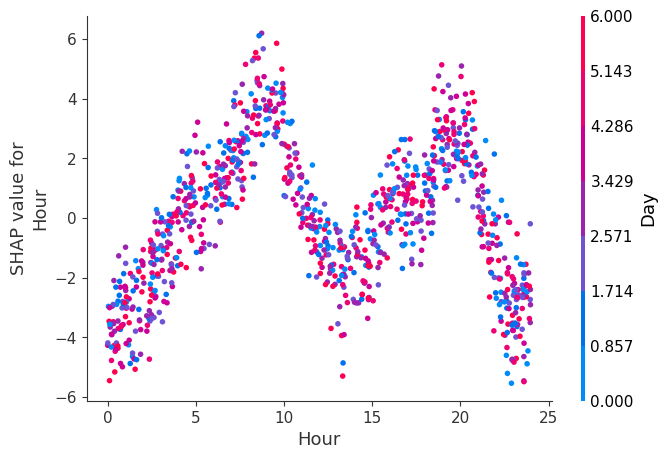

In [16]:
# Dependence plot for a specific feature
shap.dependence_plot('Hour', shap_values, X)

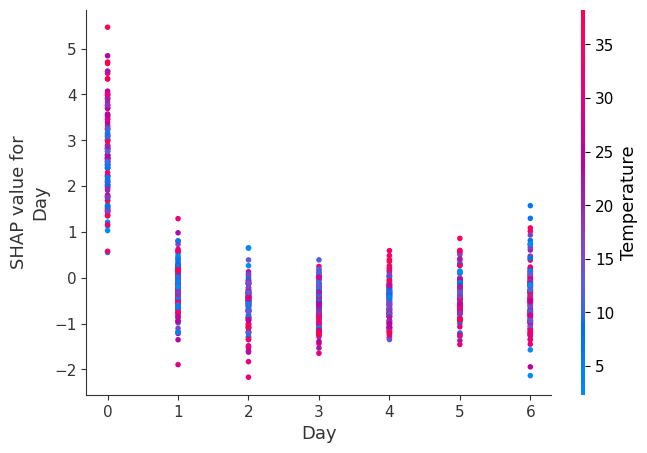

In [11]:
# Dependence plot for a specific feature
shap.dependence_plot('Day', shap_values, X)

Shapley values offer a robust method for interpreting machine learning models by providing a fair and comprehensive attribution of feature contributions to individual predictions. In the context of electricity markets, this can help stakeholders understand the impact of various factors on electricity prices and make more informed decisions.